Walk-through and checking for each block of code provided:

    Imports:
        Standard libraries and packages are imported.

    Loading Data:
        Loaded the CIFAR-10 dataset using cifar10.load_data()
        The shapes of the training and test sets are printed out to confirm the data loading process.

    Determining Unique Classes and Class Distribution:
        Method to find unique classes and to visualize the class distribution.

    Data Normalization and One-hot Encoding:
     transforming categoral data into numverical and classification data into numerical

    Data Splitting:
        Data is concatenated and split into training, validation, and test sets.

    Data Augmentation:
        ImageDataGenerator for data augmentation and avoid overfitting

    Model Architecture:
        We use a simple CNN architecture using Sequential API

    Model Compilation:
        The model is compiled with Adam optimizer and categorical cross-entropy loss for multi-class classification tasks.

    Model Training:
        The model training is done using the data generator for the training set and using validation data for validation

    Plotting Training and Validation Metrics:
        Plots for training and validation accuracy

    Model Evaluation:
        Predictions are made on the test set and converted to class labels using tf.argmax.
        A classification report is generated using classification_report from scikit-learn.
        A confusion matrix is generated and visualized using confusion_matrix from scikit-learn and heatmap from seaborn.

In [40]:
# Load libraries

import tensorflow as tf
import keras_tuner as kt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler


Training samples: (50000, 32, 32, 3), Training labels: (50000, 1)
Test samples: (10000, 32, 32, 3), Test labels: (10000, 1)
Number of classes: 10


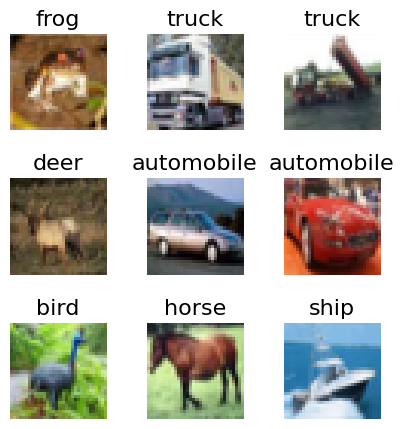

In [41]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Print the shapes
print(f'Training samples: {x_train.shape}, Training labels: {y_train.shape}')
print(f'Test samples: {x_test.shape}, Test labels: {y_test.shape}')

# Determine the number of unique classes
num_classes = len(np.unique(y_train))
print(f'Number of classes: {num_classes}')

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting a few images
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
axes = axes.ravel()
for i in np.arange(0, 9):
    axes[i].imshow(x_train[i])
    axes[i].set_title(class_names[y_train[i][0]], fontsize=16)
    plt.subplots_adjust(hspace=0.5)
    axes[i].axis('off')
plt.show()


In [42]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    if X.shape != (32,32,3):
        X = X.reshape(32,32,3)

    plt.imshow(X)
    plt.show()
    plt.close()

In [43]:
def scatterPlotImage(image):

    # Reshape the image to (32*32, 3) to prepare for the 3D scatter plot
    image_reshaped = image.reshape(-1, 3)

    # Create a 3D scatter plot
    fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(111)

    # Extract R, G, and B channels
    r = image_reshaped[:, 0]
    g = image_reshaped[:, 1]

    # Create the scatter plot
    ax.scatter(r, g, marker='.')

    # Set axis labels
    ax.set_xlabel('Red Channel')
    ax.set_ylabel('Green Channel')
    # ax.set_zlabel('Blue Channel')

    plt.axhline(0, color='gray', linestyle='-')
    plt.axvline(0, color='gray', linestyle='-')

    highest_abs_value = max(max(r, key=abs), max(g, key=abs))

    ax.set_xlim(-1 * highest_abs_value, highest_abs_value)
    ax.set_ylim(-1 * highest_abs_value, highest_abs_value)

    # Show the plot
    plt.title("Scatter plot the first two channels of an image")
    plt.show()

In [44]:
# Splitting data
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))
x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [45]:
print('Reshape x_train:')
print(' Before: ' + str(x_train.shape))
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
print(' After: ' + str(x_train.shape))

print('Reshape x_val:')
print(' Before: ' + str(x_val.shape))
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1] * x_val.shape[2] * x_val.shape[3])
print(' After: ' + str(x_val.shape))

print('Reshape x_test:')
print(' Before: ' + str(x_test.shape))
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])
print(' After: ' + str(x_test.shape))

Reshape x_train:
 Before: (48000, 32, 32, 3)
 After: (48000, 3072)
Reshape x_val:
 Before: (6000, 32, 32, 3)
 After: (6000, 3072)
Reshape x_test:
 Before: (6000, 32, 32, 3)
 After: (6000, 3072)


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


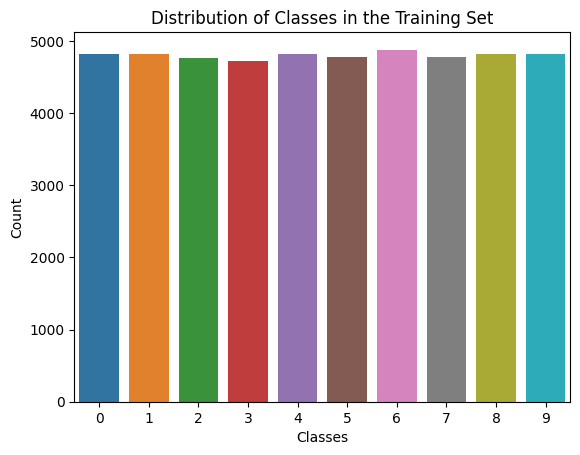

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


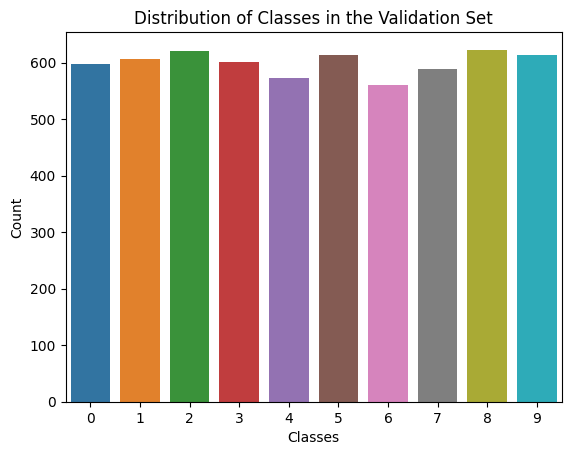

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


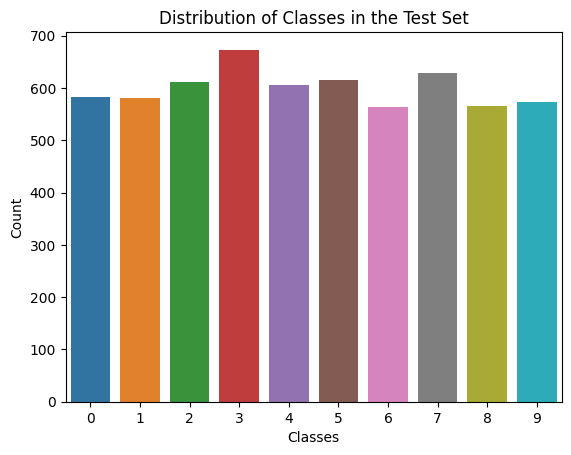

In [46]:
# Distribution of Classes in Training Set
sns.countplot(y_train.ravel())
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes in the Training Set')
plt.show()

# Distribution of Classes in Validation Set
sns.countplot(y_val.ravel())
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes in the Validation Set')
plt.show()

# Distribution of Classes in Test Set
sns.countplot(y_test.ravel())
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes in the Test Set')
plt.show()

In [47]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [48]:
x_train = x_train.astype('float32')
x_train /= 255
x_val = x_val.astype('float32')
x_val /= 255
x_test = x_test.astype('float32')
x_test /= 255

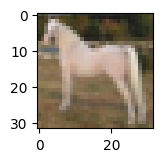

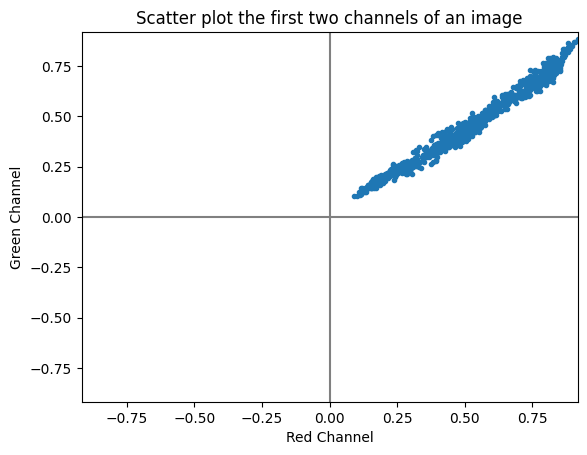

In [49]:
plotImage(x_train[12, :])
scatterPlotImage(x_train[12, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


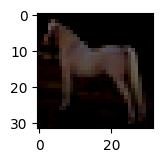

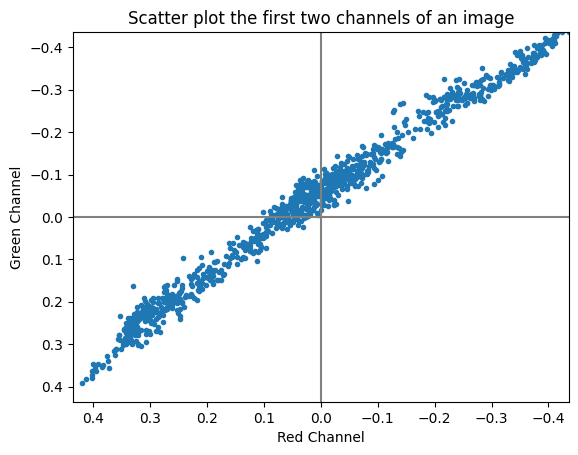

In [50]:
mean = np.mean(x_train, axis=0)

x_train_normalized =  x_train - mean
x_val_normalized =  x_val - mean
x_test_normalized =  x_test - mean

plotImage(x_train_normalized[12, :])
scatterPlotImage(x_train_normalized[12, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


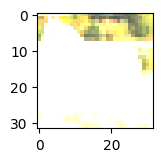

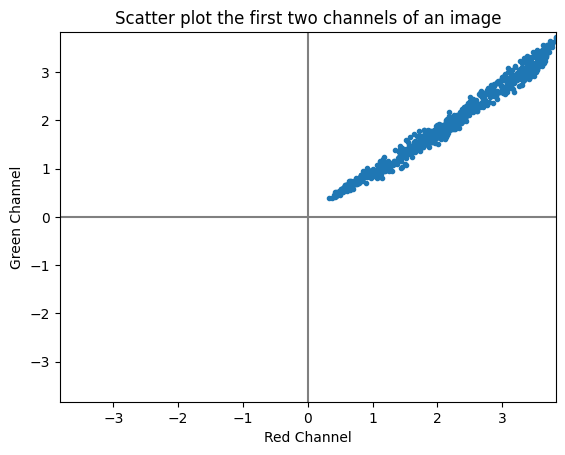

In [51]:
std = np.std(x_train, axis=0)

x_train_std =  x_train / std
x_val_std =  x_val / std
x_test_std =  x_test / std

plotImage(x_train_std[12, :])
scatterPlotImage(x_train_std[12, :])

In [52]:
# don't use x_train_std
cov = np.cov(x_train_normalized, rowvar=False)

In [53]:
epsilon = 0.1
eigvals, eigvecs = np.linalg.eigh(cov)
zca_matrix  = eigvecs @ np.diag(1.0 / np.sqrt(eigvals + epsilon)) @ eigvecs.T

x_train_whitened = x_train_normalized @ zca_matrix
x_val_whitened = x_val_normalized @ zca_matrix
x_test_whitened = x_test_normalized @ zca_matrix

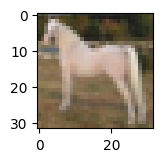

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


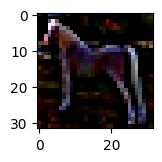

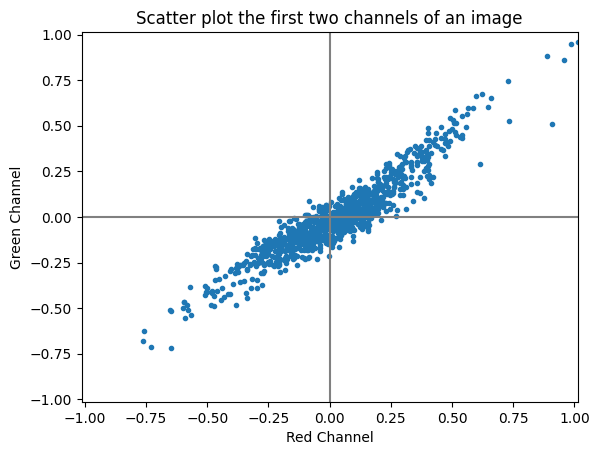

In [54]:
plotImage(x_train[12, :])
plotImage(x_train_whitened[12, :])
scatterPlotImage(x_train_whitened[12, :])

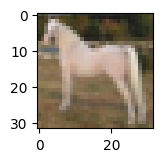

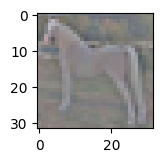

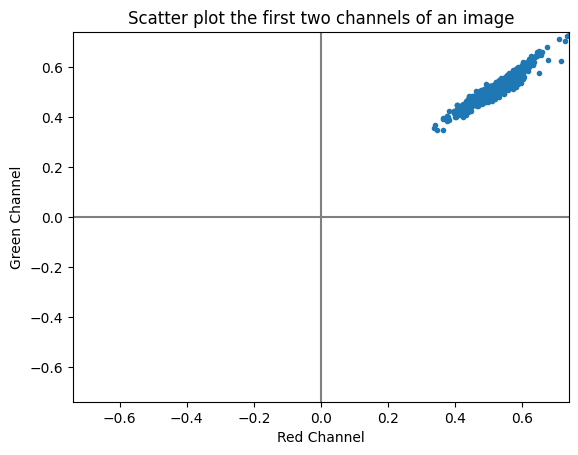

In [55]:
x_train_whitened_norm = (x_train_whitened - x_train_whitened.min()) / (x_train_whitened.max() - x_train_whitened.min())

plotImage(x_train[12, :])
plotImage(x_train_whitened_norm[12, :])
scatterPlotImage(x_train_whitened_norm[12, :])

In [56]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
explained_variance_ratio = pca.explained_variance_ratio_

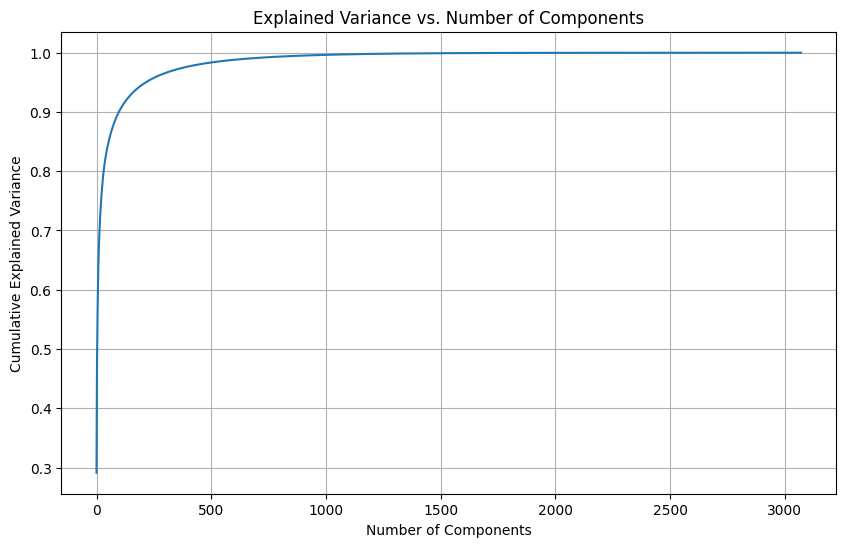

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [58]:
# n_components = 100  # Replace with the desired number of components
# pca = PCA(n_components=n_components)
# pca.fit(x_train_whitened)

# x_train_whitened = pca.transform(x_train_whitened)
# x_val_whitened = pca.transform(x_val_whitened)
# x_test_whitened = pca.transform(x_test_whitened)

In [59]:
print('min:', x_train_whitened.min())
print('max:', x_train_whitened.max())

print('min:', x_val_whitened.min())
print('max:', x_val_whitened.max())

print('min:', x_test_whitened.min())
print('max:', x_test_whitened.max())

min: -2.2586387247633084
max: 2.1683592221904875
min: -2.135100501671652
max: 2.055073014181864
min: -2.002522867757239
max: 2.1949438875925487


In [60]:
x_train = x_train_whitened
x_val = x_val_whitened
x_test = x_test_whitened

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_val = x_val.reshape(x_val.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)


In [61]:
# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train.reshape(x_train.shape[0], 32, 32, 3))

In [62]:
K = len(class_names) # number of classes
 
# Build the model using the functional API.
# the number of filters is increased from 32 to 64 to 128 as the network goes deeper.
# This is a common practice in convolutional neural networks, as it allows the network 
# to learn more complex features as it processes the input image.
input_layer = tf.keras.layers.Input(shape=x_train[0].shape)
neuraln = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
neuraln = tf.keras.layers.BatchNormalization()(neuraln)
neuraln = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(neuraln)
neuraln = tf.keras.layers.BatchNormalization()(neuraln)
neuraln = tf.keras.layers.MaxPooling2D((2, 2))(neuraln)
 
neuraln = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(neuraln)
neuraln = tf.keras.layers.BatchNormalization()(neuraln)
neuraln = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(neuraln)
neuraln = tf.keras.layers.BatchNormalization()(neuraln)
neuraln = tf.keras.layers.MaxPooling2D((2, 2))(neuraln)
 
neuraln = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(neuraln)
neuraln = tf.keras.layers.BatchNormalization()(neuraln)
neuraln = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(neuraln)
neuraln = tf.keras.layers.BatchNormalization()(neuraln)
neuraln = tf.keras.layers.MaxPooling2D((2, 2))(neuraln)
 
neuraln = tf.keras.layers.Flatten()(neuraln)
neuraln = tf.keras.layers.Dropout(0.2)(neuraln)
 
# Hidden layer
neuraln = tf.keras.layers.Dense(1024, activation='relu')(neuraln)
neuraln = tf.keras.layers.Dropout(0.2)(neuraln)
 
# Output layer
output_layer = tf.keras.layers.Dense(K, activation='softmax')(neuraln)

model = tf.keras.models.Model(input_layer, output_layer)

print(model.output_shape)

# Compile the model
model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

# Display a summary of the model architecture
model.summary()

earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs_2')

# Training the model
batch_size = 32  # for example
epochs = 100  # for example
history = model.fit(
                    datagen.flow(x_train.reshape(x_train.shape[0], 32, 32, 3), y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_val.reshape(x_val.shape[0], 32, 32, 3), y_val),
                    verbose=1, callbacks=[earlystopping, tensorboard_callback])


(None, 10)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32) 

In [63]:
# Automatic Hyper Parameter Tuning with Keras Tuner is commented out on purpose.

# def build_model(hp):
#     model = tf.keras.models.Sequential()

#     model.add(tf.keras.layers.Conv2D(hp.Int('input_units',
#                                 min_value=32,
#                                 max_value=256,
#                                 step=32), (3, 3), input_shape=x_train.shape[1:]))

#     model.add(tf.keras.layers.Activation('relu'))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#     for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
#         model.add(tf.keras.layers.Conv2D(hp.Int(f'conv_{i}_units',
#                                 min_value=32,
#                                 max_value=256,
#                                 step=32), (3, 3)))
#         model.add(tf.keras.layers.Activation('relu'))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#     model.add(tf.keras.layers.Flatten())
#     for i in range(hp.Int('n_connections', 1, 4)):
#         model.add(tf.keras.layers.Dense(hp.Choice(f'n_nodes',
#                                   values=[128, 256, 512, 1024])))
#         model.add(tf.keras.layers.Activation('relu'))
#     model.add(tf.keras.layers.Dense(10))
#     model.add(tf.keras.layers.Activation("softmax"))

#     model.compile(optimizer="adam",
#                   loss="categorical_crossentropy",
#                   metrics=["accuracy"])

#     return model

# tuner = kt.RandomSearch(build_model,
#                         objective='val_accuracy',
#                         max_trials=10,  # Number of hyperparameter combinations to try
#                         directory='my_tuning_dir',  # Directory to store results
#                         project_name='my_cifar10_tuning')

# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# tuner.search(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[stop_early], verbose=1)

# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# model = tuner.hypermodel.build(best_hps)


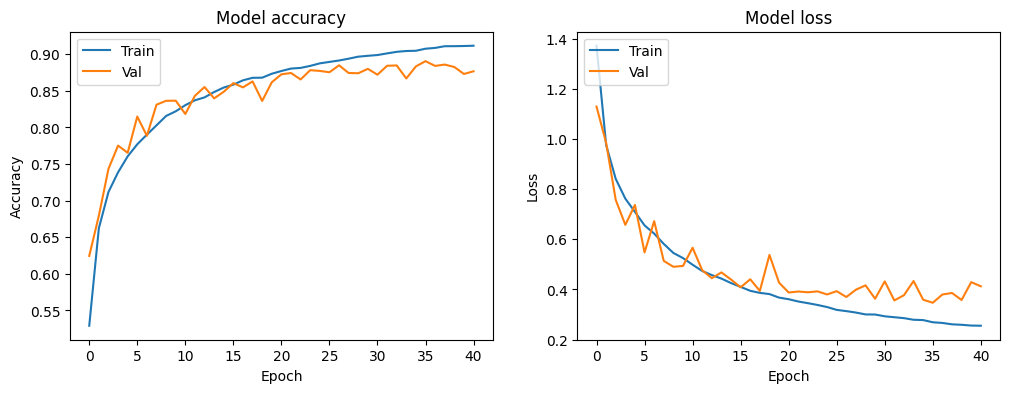

In [64]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


188/188 [==============================] - 8s 44ms/step
              precision    recall  f1-score   support

    airplane       0.91      0.90      0.91       583
  automobile       0.91      0.96      0.93       581
        bird       0.83      0.87      0.85       611
         cat       0.82      0.80      0.81       673
        deer       0.87      0.88      0.87       606
         dog       0.87      0.81      0.84       616
        frog       0.87      0.94      0.90       563
       horse       0.94      0.90      0.92       628
        ship       0.96      0.92      0.94       566
       truck       0.92      0.93      0.93       573

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



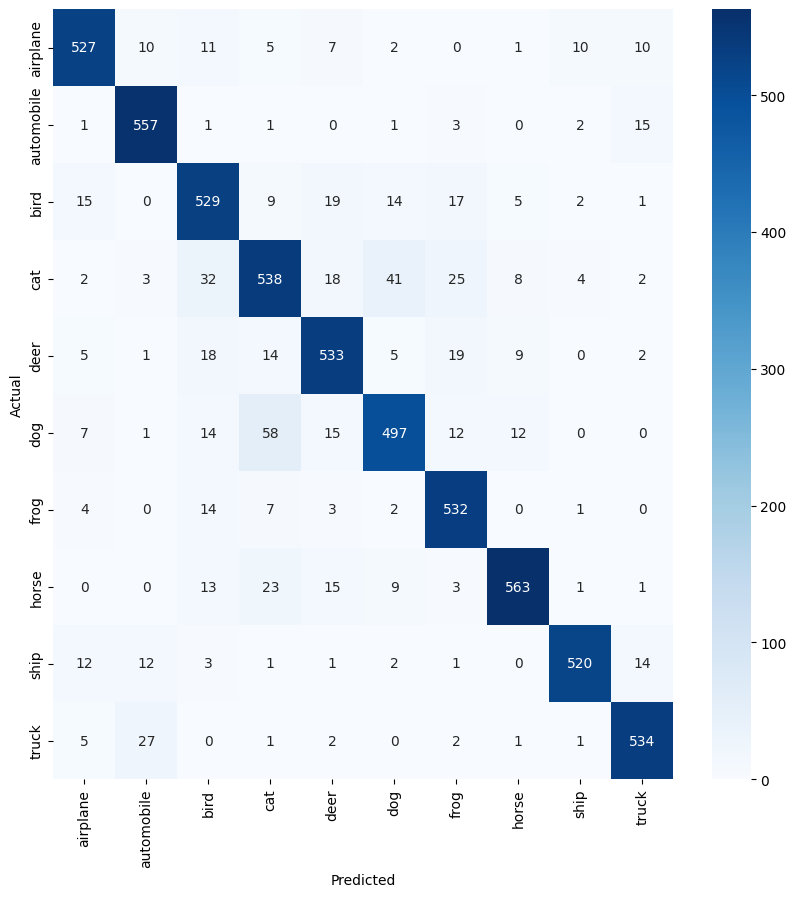

In [65]:
# Make predictions on the test set
# y_pred = model.predict(x_test.reshape(x_test.shape[0], 32, 32, 3))
y_pred = model.predict(x_test)

# Convert the predicted and true labels to the original format (not one-hot encoded)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true = tf.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
